# Mathematically, we know that a+b = b+a. 

# Let's show that:  
# d=1 and then D=1  
# ==   
# D=1 and then d=1  

In [1]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product
from typing import Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Pg 145
# J&J Quarterly EPS since January 1960 to  december 1980
df = pd.read_csv('../data/jj.csv')
df.tail() # shape (84, 2)

,date,data
79,1979-10-01,9.99
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02
83,1980-10-01,11.61


In [3]:
# # Figure 7.5 in pg 147

# fig, ax = plt.subplots()

# ax.plot(train.date, train['data'])
# ax.set_xlabel('Date')
# ax.set_ylabel('Earnings per share (USD)')

# plt.xticks(np.arange(0, 81, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

# fig.autofmt_xdate()
# plt.tight_layout()


In [4]:
ad_fuller_result = adfuller(df['data'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')
df['data'].std()

ADF Statistic: 2.7420165734574806
p-value: 1.0


np.float64(4.309991176824922)

# D=1, then d=1

In [5]:
df_seasonal_diff = df['data'][4:].values - df['data'][:-4].values # type:numpy.ndarray # this also differences once lag 4, which is what we want

ad_fuller_result = adfuller(df_seasonal_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')
df_seasonal_diff.std()

ADF Statistic: -0.34305097783931493
p-value: 0.9191818417006344


np.float64(0.6621941306180725)

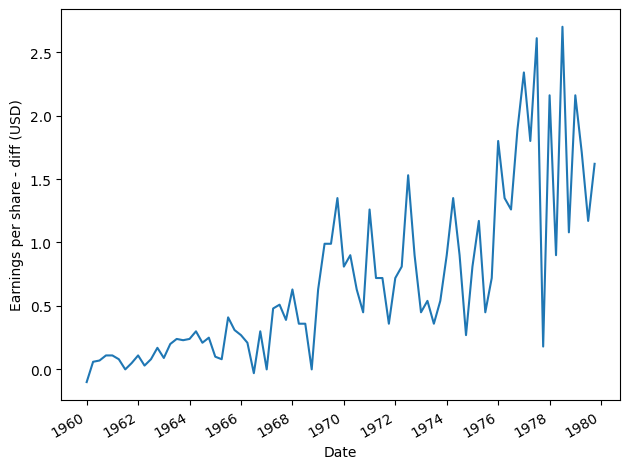

In [7]:
fig, ax = plt.subplots()

ax.plot(df['date'][4:], df_seasonal_diff)
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share - diff (USD)')

plt.xticks(np.arange(0, 81, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

In [8]:
#df_seasonal_diff_diff = df_seasonal_diff[1:] - df_seasonal_diff[:-1]
df_seasonal_diff_diff = np.diff(df_seasonal_diff, n=1)

ad_fuller_result = adfuller(df_seasonal_diff_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')
df_seasonal_diff_diff.std()

ADF Statistic: -6.514982284611445
p-value: 1.0769336844684507e-08


np.float64(0.5999825178754622)

In [9]:
df_seasonal_diff_diff

array([ 1.60000000e-01,  1.00000000e-02,  4.00000000e-02, -5.55111512e-17,
       -3.00000000e-02, -8.00000000e-02,  5.00000000e-02,  6.00000000e-02,
       -8.00000000e-02,  5.00000000e-02,  9.00000000e-02, -8.00000000e-02,
        1.10000000e-01,  4.00000000e-02, -1.00000000e-02,  1.00000000e-02,
        6.00000000e-02, -9.00000000e-02,  4.00000000e-02, -1.50000000e-01,
       -2.00000000e-02,  3.30000000e-01, -1.00000000e-01, -4.00000000e-02,
       -6.00000000e-02, -2.40000000e-01,  3.30000000e-01, -3.00000000e-01,
        4.80000000e-01,  3.00000000e-02, -1.20000000e-01,  2.40000000e-01,
       -2.70000000e-01,  0.00000000e+00, -3.60000000e-01,  6.30000000e-01,
        3.60000000e-01,  0.00000000e+00,  3.60000000e-01, -5.40000000e-01,
        9.00000000e-02, -2.70000000e-01, -1.80000000e-01,  8.10000000e-01,
       -5.40000000e-01,  0.00000000e+00, -3.60000000e-01,  3.60000000e-01,
        9.00000000e-02,  7.20000000e-01, -6.30000000e-01, -4.50000000e-01,
        9.00000000e-02, -

# d=1, then D=1

In [10]:
df_diff = np.diff(df['data'], n=1)

ad_fuller_result = adfuller(df_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')
df_diff.std()

ADF Statistic: -0.4074097636380464
p-value: 0.9088542416911305


np.float64(1.416000485573012)

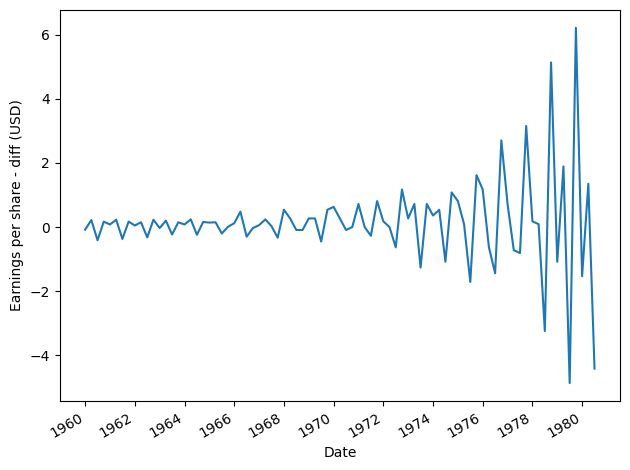

In [11]:
fig, ax = plt.subplots()

ax.plot(df['date'][1:], df_diff)
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share - diff (USD)')

plt.xticks(np.arange(0, 81, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

In [12]:
df_diff_seasonal_diff = df_diff[4:] - df_diff[:-4]

ad_fuller_result = adfuller(df_diff_seasonal_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')
df_diff_seasonal_diff.std()

ADF Statistic: -6.514982284611445
p-value: 1.0769336844684507e-08


np.float64(0.5999825178754622)

In [13]:
df_diff_seasonal_diff

array([ 1.60000000e-01,  1.00000000e-02,  4.00000000e-02, -5.55111512e-17,
       -3.00000000e-02, -8.00000000e-02,  5.00000000e-02,  6.00000000e-02,
       -8.00000000e-02,  5.00000000e-02,  9.00000000e-02, -8.00000000e-02,
        1.10000000e-01,  4.00000000e-02, -1.00000000e-02,  1.00000000e-02,
        6.00000000e-02, -9.00000000e-02,  4.00000000e-02, -1.50000000e-01,
       -2.00000000e-02,  3.30000000e-01, -1.00000000e-01, -4.00000000e-02,
       -6.00000000e-02, -2.40000000e-01,  3.30000000e-01, -3.00000000e-01,
        4.80000000e-01,  3.00000000e-02, -1.20000000e-01,  2.40000000e-01,
       -2.70000000e-01,  0.00000000e+00, -3.60000000e-01,  6.30000000e-01,
        3.60000000e-01,  0.00000000e+00,  3.60000000e-01, -5.40000000e-01,
        9.00000000e-02, -2.70000000e-01, -1.80000000e-01,  8.10000000e-01,
       -5.40000000e-01,  0.00000000e+00, -3.60000000e-01,  3.60000000e-01,
        9.00000000e-02,  7.20000000e-01, -6.30000000e-01, -4.50000000e-01,
        9.00000000e-02, -

*********************************************************

Exactly same ADF Statistic, p-value and standard deviation

In [14]:
delta = df_seasonal_diff_diff - df_diff_seasonal_diff
delta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])